In [9]:
from openmm.app import HBonds
print(HBonds.__str__())

HBonds


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_system_data(system, window=100, figsize=(10, 8)):
    """
    Plot and save time series data with moving averages for a given system.
    
    :param system: String identifier for the system (used for file naming)
    :param window: Size of the moving average window
    :param figsize: Size of the figure (width, height)
    """
    def plot_with_moving_average(ax, df, x_column, y_column, moving_average=True):
        """
        Plot original data and its moving average on a given axis.
        """
        ax.plot(df[x_column], df[y_column], label='Original', alpha=0.5)
        if moving_average:
            rolling_mean = df[y_column].rolling(window=window, center=True, min_periods=1).mean()
            ax.plot(df[x_column], rolling_mean, label=f'Moving Average (window={window})', color='red')
        ax.set_xlabel(x_column)
        ax.set_ylabel(y_column)
        ax.legend()

    os.makedirs('tmp', exist_ok=True)

    # Read the CSV file
    file_path = f"{system}.out"
    try:
        df = pd.read_csv(file_path, sep=',')
    except FileNotFoundError:
        print(f"Error: File {file_path} not found.")
        return

    # Get column names for indices 3, 4, 5, 6
    columns_to_plot = [
        "Potential Energy / $10^3 k_B T$",
        "Kinetic Energy /  $10^3 k_B T$",
        "Total Energy /  $10^3 k_B T$",
        "Temperature (K)",
        "Box Volume (nm^3)",
        "Density (g/mL)"
        ]

    print('All columns in the data:', df.columns)

    # convert to kBT
    T = df['Temperature (K)']
    kB = 1.38064852e-23
    mol = 6.02214076e23
    df["Potential Energy / $10^3 k_B T$"] = df["Potential Energy (kJ/mole)"] / (mol * kB * T)
    df["Kinetic Energy /  $10^3 k_B T$"] = df["Kinetic Energy (kJ/mole)"] / (mol * kB * T)
    df["Total Energy /  $10^3 k_B T$"] = df["Total Energy (kJ/mole)"] / (mol * kB * T)

    # Create a single figure with four subfigures
    fig, axs = plt.subplots(3, 2, figsize=figsize)
    fig.suptitle(f'System: {system}', fontsize=16)

    # Flatten the 2x2 array of axes for easier iteration
    axs = axs.flatten()

    # Plot for each specified column
    for i, column in enumerate(columns_to_plot):
        plot_with_moving_average(
            axs[i], 
            df, 
            'Time (ps)', 
            column,
            moving_average=True
            )

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)  # Adjust to prevent title overlap

    # change DPI to 300 for showing in the notebook

    # Save the figure
    # get the output dir from the same dir as the original
    # extract from file_path the directory
    # output_dir = "/".join(file_path.split("/")[0:-2])
    # if not os.path.exists(output_dir):
    #     os.makedirs(output_dir)
    # output_file = os.path.join(output_dir, f"{system}_plot.png")
    plt.savefig('tmp/tmp.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()  # Close the figure to free up memory

    # print(f"Plot saved as {output_file}")

All columns in the data: Index(['#"Progress (%)"', 'Step', 'Time (ps)', 'Potential Energy (kJ/mole)',
       'Kinetic Energy (kJ/mole)', 'Total Energy (kJ/mole)', 'Temperature (K)',
       'Box Volume (nm^3)', 'Density (g/mL)', 'Speed (ns/day)',
       'Time Remaining'],
      dtype='object')


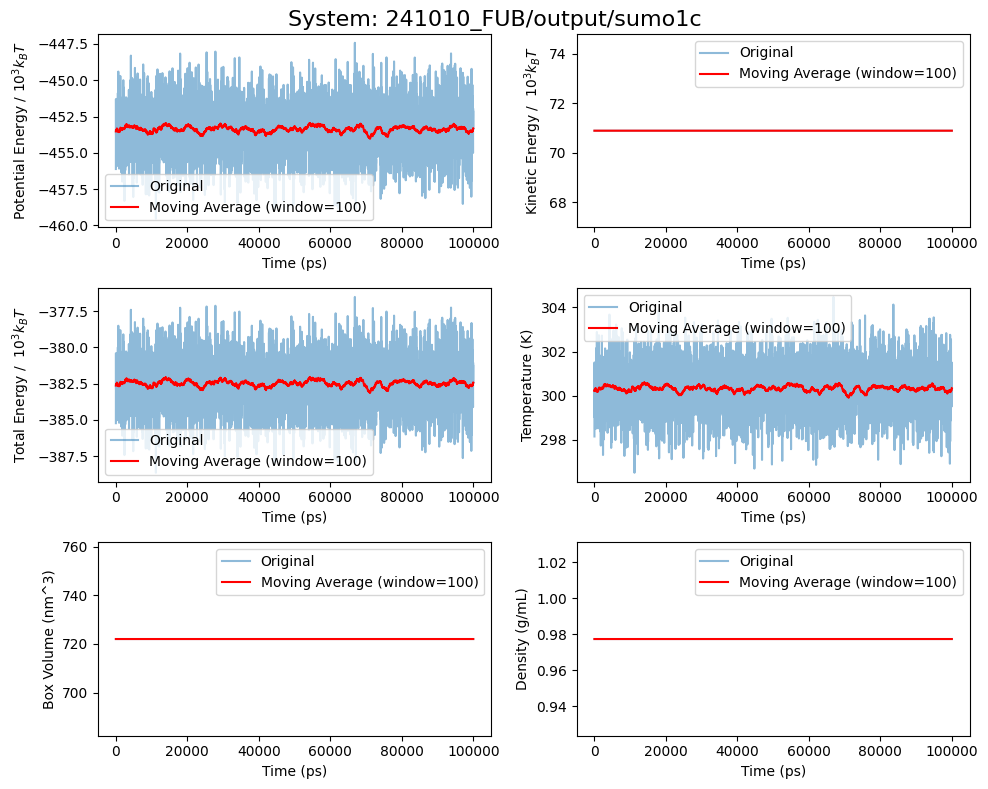

In [9]:
plot_system_data('241010_FUB/output/sumo1c')

In [2]:
plot_system_data("S1_Best_A")
plot_system_data("S1_Best_AB")
plot_system_data("S2_Best_A")
plot_system_data("S2_Best_AB")

Plot saved as output/S1_Best_A_plot.png
Plot saved as output/S1_Best_AB_plot.png
Plot saved as output/S2_Best_A_plot.png
Plot saved as output/S2_Best_AB_plot.png


In [3]:
plot_system_data("S1_Best_AB_240723_200344")

Plot saved as output/S1_Best_AB_240723_200344_plot.png


In [2]:
import os
import imageio
from PIL import Image

def create_gif_from_pngs(input_folder, output_gif, duration=0.5, loop=0, compress_factor=0.5):
    """
    Create a compressed GIF from all PNG files in a folder.
    
    :param input_folder: Path to the folder containing PNG files
    :param output_gif: Path and filename for the output GIF
    :param duration: Duration of each frame in seconds (default: 0.5)
    :param loop: Number of times to loop the GIF. 0 means loop forever (default: 0)
    :param compress_factor: Factor to resize images for compression (default: 0.5)
    """
    # Get all PNG files in the input folder
    png_files = [f for f in os.listdir(input_folder) if f.lower().endswith('.png')]
    png_files.sort()  # Sort files to ensure correct order

    images = []
    for png_file in png_files:
        file_path = os.path.join(input_folder, png_file)
        # Open the image and resize it for compression
        with Image.open(file_path) as img:
            # Calculate new size
            new_size = (int(img.width * compress_factor), int(img.height * compress_factor))
            # Resize the image
            img_resized = img.resize(new_size, Image.LANCZOS)
            # Convert to RGB mode if it's not already
            if img_resized.mode != 'RGB':
                img_resized = img_resized.convert('RGB')
            # Append to the list
            images.append(img_resized)

    # Save as GIF
    imageio.mimsave(output_gif, images, duration=duration, loop=loop)
    print(f"GIF created and saved as {output_gif}")

# Example usage
input_folder = '/Users/jakublala/Downloads/output 6/movie'
output_gif = '/Users/jakublala/Downloads/output 6/animated.gif'
create_gif_from_pngs(input_folder, output_gif)

GIF created and saved as /Users/jakublala/Downloads/output 6/animated.gif


All columns in the data: Index(['#"Progress (%)"', 'Step', 'Time (ps)', 'Potential Energy (kJ/mole)',
       'Kinetic Energy (kJ/mole)', 'Total Energy (kJ/mole)', 'Temperature (K)',
       'Box Volume (nm^3)', 'Density (g/mL)', 'Speed (ns/day)',
       'Time Remaining'],
      dtype='object')


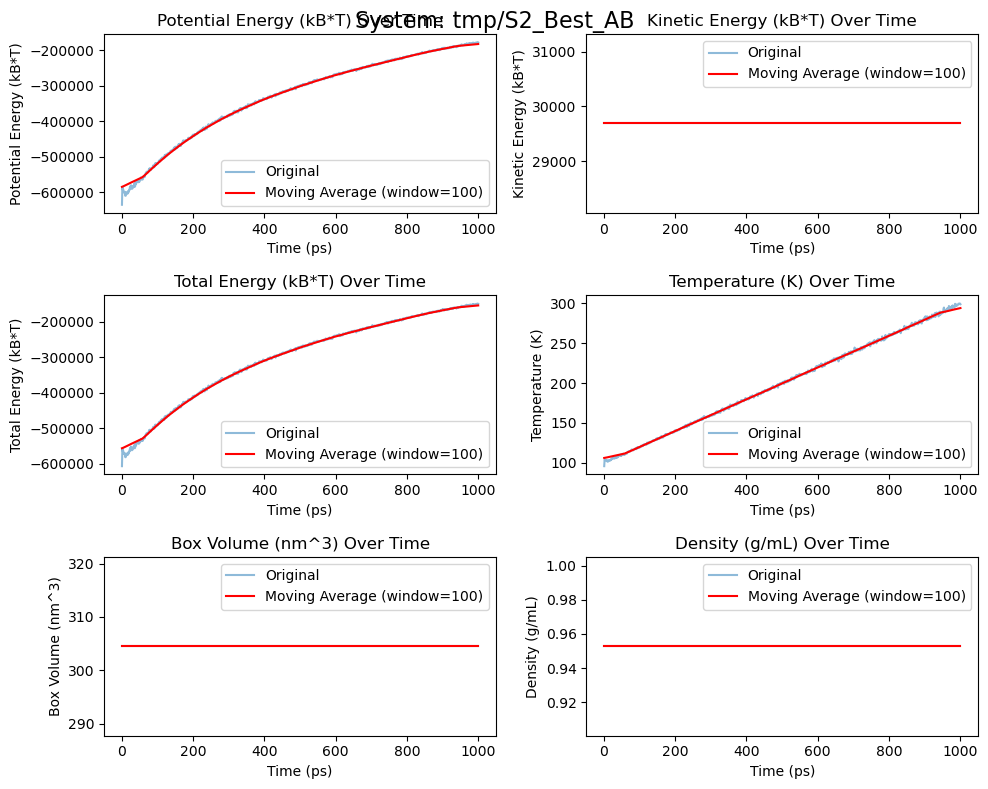

Processing sumo1:   0%|          | 0/5000 [00:00<?, ?it/s]

/Users/jakublala/.local/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Writing DCD for sumo1:   0%|          | 0/5000 [00:00<?, ?it/s]

DCD file created and saved as 241010_FUB/output/sumo1.dcd


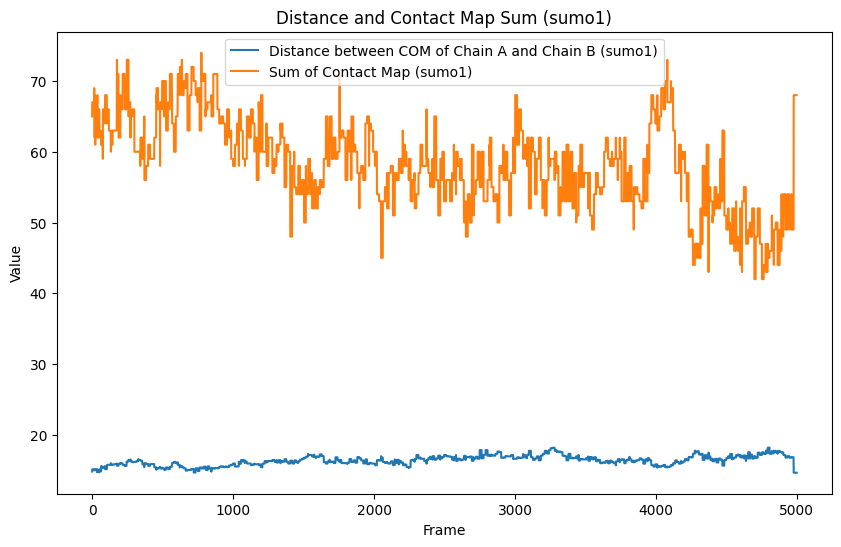

Processing sumo1c:   0%|          | 0/5000 [00:00<?, ?it/s]

Writing DCD for sumo1c:   0%|          | 0/5000 [00:00<?, ?it/s]

DCD file created and saved as 241010_FUB/output/sumo1c.dcd


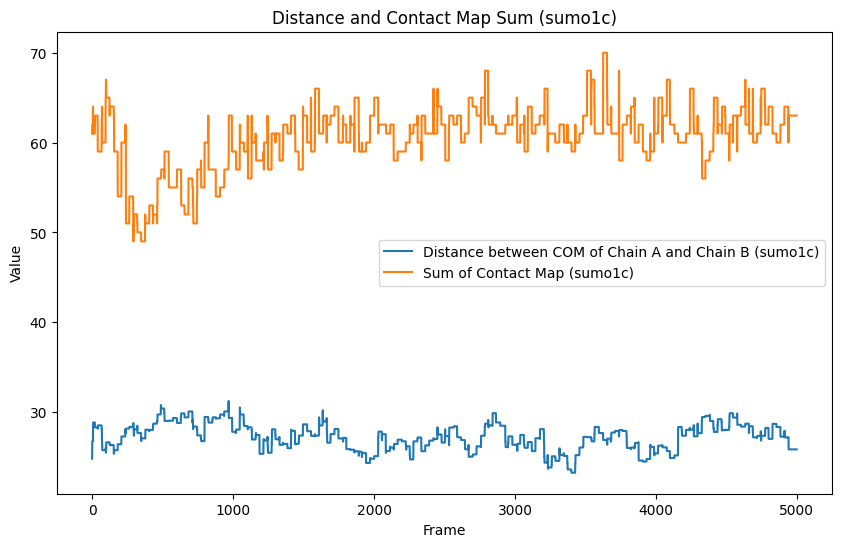

Processing p53_1:   0%|          | 0/5000 [00:00<?, ?it/s]

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [14]:
import MDAnalysis as mda
from MDAnalysis.coordinates.DCD import DCDWriter
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

def analyze_system(system_name):
    """
    Analyze the given system by calculating the distance between the centers of mass of chain A and chain B.
    
    :param system_name: Name of the system (e.g., 'sumo1', 'sumo1c', 'p53_1', 'p53_2', 'p53_end')
    """
    # Load the .xyz file and the PDB_solvated file
    xyz_file = f'{project_name}/{experiment_name}/output/{system_name}.xyz'
    pdb_solvated_file = f'{project_name}/{experiment_name}/output/{system_name}_solvated.pdb'

    # Create a Universe for the .xyz file
    u_xyz = mda.Universe(xyz_file)

    # Create a Universe for the PDB_solvated file
    u_pdb = mda.Universe(pdb_solvated_file)

    # Select only protein atoms
    protein_atoms = u_pdb.select_atoms('protein')

    # also save the PDB of just the protein
    protein_atoms.write(f'{project_name}/{experiment_name}/{system_name}/{system_name}_protein.pdb')

    # Select chain A and chain B
    chain_A = u_pdb.select_atoms('segid A')
    chain_B = u_pdb.select_atoms('segid B')

    # Create a DCD writer
    dcd_file = f'{project_name}/{experiment_name}/output/{system_name}.dcd'
    distances = []
    # compute the contact map of the interfaces (chain A and chain B)
    def compute_contact_map(universe, chain_A_indices, chain_B_indices, cutoff=8.0):
        """
        Compute the contact map between chain A and chain B.

        :param universe: MDAnalysis Universe object
        :param chain_A_indices: Indices of chain A atoms
        :param chain_B_indices: Indices of chain B atoms
        :param cutoff: Distance cutoff for contacts (in angstroms)
        :return: Contact map and sum of contacts
        """
        # Calculate distances between all pairs of CA atoms in chain A and chain B
        distances = np.zeros((len(chain_A_indices), len(chain_B_indices)))
        for i, idx_A in enumerate(chain_A_indices):
            for j, idx_B in enumerate(chain_B_indices):
                distances[i, j] = np.linalg.norm(universe.atoms[idx_A].position - universe.atoms[idx_B].position)

        # Convert distances to binary contact map (1 if contact, 0 if not)
        contact_map = (distances < cutoff).astype(int)

        # Sum of the contact map
        contact_sum = np.sum(contact_map)

        return contact_map, contact_sum
    contact_sums = []

    # Get atom indices for chain A and chain B, considering only carbon alpha atoms
    chain_A_indices = u_pdb.select_atoms('segid A and name CA').indices
    chain_B_indices = u_pdb.select_atoms('segid B and name CA').indices

    interval = 1

    from joblib import Parallel, delayed

    def process_frame(ts):
        # Update the positions of the protein atoms
        protein_atoms.positions = ts.positions[:protein_atoms.n_atoms]

        # Calculate the distance between the centers of mass of chain A and chain B
        com_A = chain_A.center_of_mass()
        com_B = chain_B.center_of_mass()
        distance = np.linalg.norm(com_A - com_B)

        # Compute the contact map for the current frame
        contact_map, contact_sum = compute_contact_map(u_xyz, chain_A_indices, chain_B_indices)

        return distance, contact_sum

    results = Parallel(n_jobs=-1)(delayed(process_frame)(ts) for ts in tqdm(u_xyz.trajectory[::interval], desc=f"Processing {system_name}"))

    distances, contact_sums = zip(*results)
    
    
    import os

    # Then, write the DCD file if it doesn't already exist
    if not os.path.exists(dcd_file):
        with DCDWriter(dcd_file, n_atoms=protein_atoms.n_atoms) as dcd:
            for ts in tqdm(u_xyz.trajectory[::interval], desc=f"Writing DCD for {system_name}"):
                # Update the positions of the protein atoms
                protein_atoms.positions = ts.positions[:protein_atoms.n_atoms]
                dcd.write(protein_atoms)
        print(f"DCD file created and saved as {dcd_file}")
    else:
        print(f"DCD file {dcd_file} already exists. Skipping DCD writing.")
    # Plot the distances and contact sums on twin axes
    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Frame')
    ax1.set_ylabel(f'Distance between COM of Chain A and Chain B ({system_name})', color=color)
    ax1.plot(distances, label=f'Distance between COM of Chain A and Chain B ({system_name})', color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:red'
    ax2.set_ylabel(f'Sum of Contact Map ({system_name})', color=color)  # we already handled the x-label with ax1
    ax2.plot(contact_sums, label=f'Sum of Contact Map ({system_name})', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(f'Distance and Contact Map Sum ({system_name})')
    plt.show()

# Analyze the systems
systems = ['sumo1', 'sumo1c', 'p53_1', 'p53_2', 'p53_end']
experiment_name = 'OPES_100ns'
project_name = '241010_FoldingUponBinding'
for system in systems:
    analyze_system(system, experiment_name, project_name)


In [3]:
def check_pdb_format(pdb_file_path):
    """
    Check the PDB file for common formatting issues, such as non-numeric residue numbers.
    
    Args:
        pdb_file_path (str): Path to the PDB file.
    
    Returns:
        bool: True if the file is correctly formatted, False otherwise.
    """
    with open(pdb_file_path, 'r') as file:
        for line_number, line in enumerate(file, start=1):
            if line.startswith(('ATOM', 'HETATM')):
                # Extract the residue number field (columns 23-26)
                residue_number_str = line[22:26].strip()
                
                # Check if the residue number is a valid integer
                if not residue_number_str.isdigit():
                    print(f"Error on line {line_number}: Invalid residue number '{residue_number_str}'")
                    return False
                
                # Additional checks can be added here if needed

    print("PDB file format is correct.")
    return True

# Example usage
pdb_file_path = '../data/input/241010_FUB/p53/p53_1.pdb'
is_valid = check_pdb_format(pdb_file_path)

PDB file format is correct.
